# Alumno: Gerardo de Miguel González

1.- Crea una función a la que se pase como input: un vector “x” de features distribuidos uniformemente, unos valores “a” y “b” parámetros de un modelo lineal “y = a + b * x”, y parámetros “m” y “n” que nos den la sigma de una distribución gaussiana: “sigma = m + n * x^2”. La función debe devolver una matriz que contenga en la primera columna un vector con el término independiente “y = a + b * x + gauss(0, sigma = m + n * x^2)”, y en la segunda columna la “sigma = m + n * x^2”. Nota: Este ejercicio es igual al que ya realizamos, salvo porque ahora la sigma del término estocástico depende de cada punto.

In [15]:
#::GMG::Creo la función de muestras con ruido gausiano con sigma variable
muestras <- function(x, a, b, m, n) {   
    sigma <- m + n * x ** 2
    y <- a + b * x + rnorm(x, 0, sigma)
    Y <- cbind(y, sigma)
    return (Y)
}

2.- Crea una función que encuentre el valor de los parámetros que hace máximo el ML usando la fórmula análitica.

In [16]:
#::GMG:: implemento la solución analítica según slide 7 Chapter 6 apuntes pdf en moodle
thetas <- function(x,y, sigma) {
    i <- rep(1, length(y))
    X <- cbind(i,x)
    Cov_y <- sigma^2*diag(x = 1, nrow = length(sigma))
    Theta <- solve(t(X) %*% solve(Cov_y) %*% X) %*% (t(X) %*% solve(Cov_y)) %*% y
    return(Theta)
}

3.- Crea un vector x distribuido uniformemente en [0, 10], y encuentra el mínimo para a = 1, b = 2, m = 0.1 y n = 0.04. Pinta los datos, sus errores y la recta de ajuste. 

In [17]:
#::GMG::Hacemos el experimento reproducible
set.seed(1)

In [19]:
#::GMG::Calculo un vector aleatorio de 100 elementos de 0 a 10
x <- sample(x = seq(from = 0, to = 10, length.out = 100), replace=FALSE)

In [20]:
#::GMG::Genero la matriz de muestras Y, Sigma
Y <- muestras(x = x, a = 1, b = 2, m = 0.1, n = 0.04)

In [21]:
#::GMG::Calculo los thetas MLE de la recta de ajuste
T <- thetas(x = x, y = Y[,1], sigma = Y[,2])

In [23]:
print(T)

       [,1]
i 0.9702775
x 2.0166767


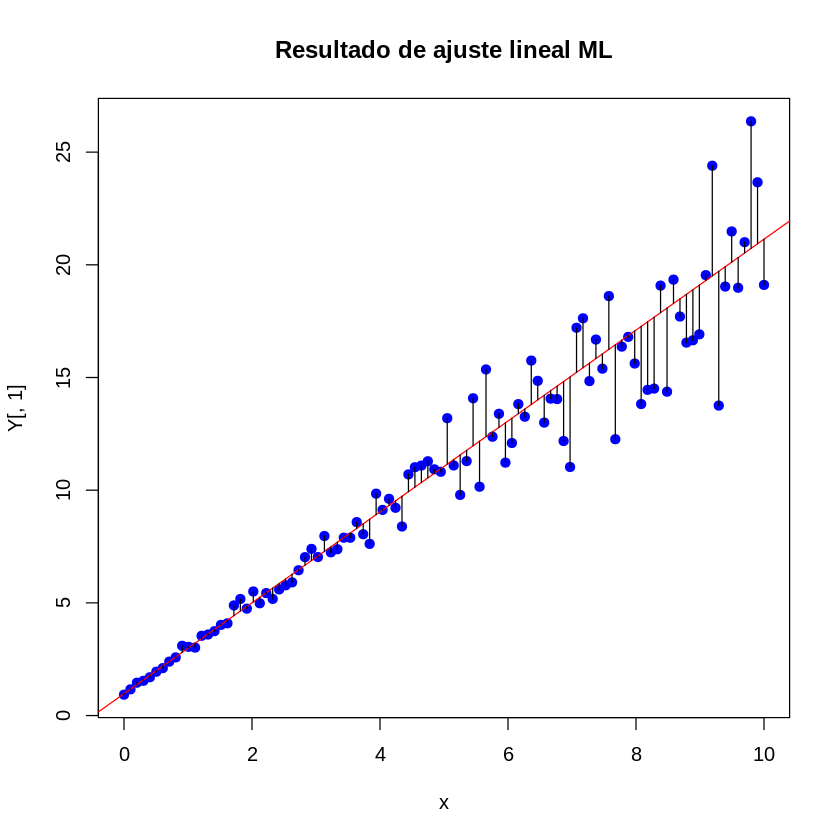

In [27]:
#::GMG::Pinto muestras, errores y recta de ajuste
plot(x, Y[,1], col='blue', pch = 19)
abline(T[1], T[2], col = 'red')
segments(x, T[1] + T[2] * x, x, Y[,1])
title('Resultado de ajuste lineal ML')

4.- Genera un vector con 10000 números distribuidos exponencialmente con un valor de rate = 1/5.27. Crea un histograma con este vector usando como rango [0, 30] y con una anchura de bin = 1.

In [28]:
#::GMG::Genero un vector de 10000 números distribuidos exponencialmente
set.seed(1)
x_exp <- rexp(n = 10000, rate = 1/5.27)

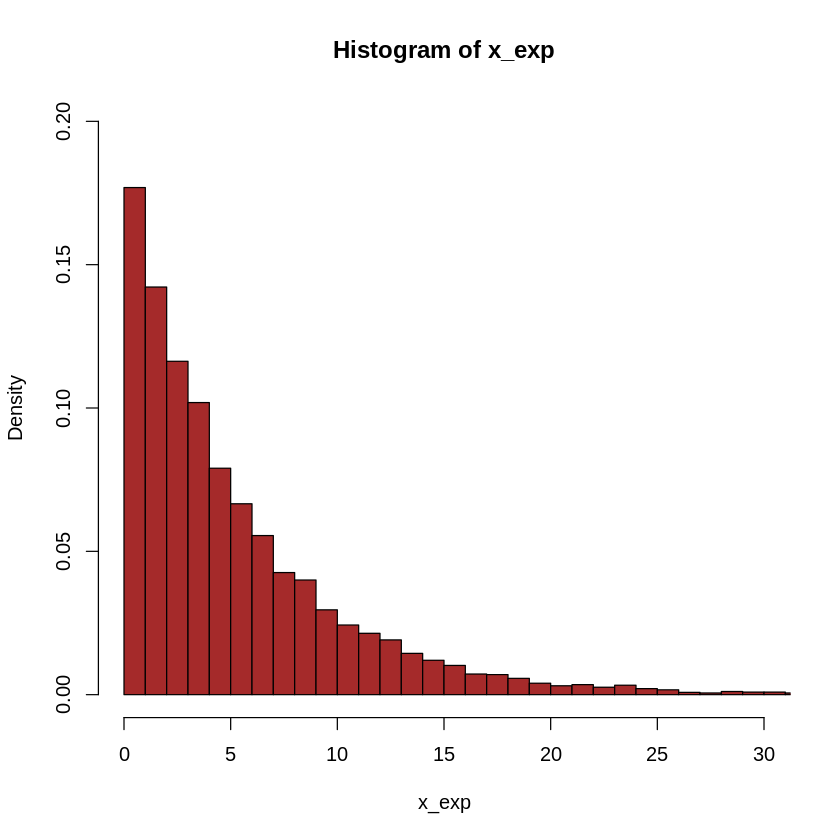

In [31]:
#::GMG::Creo el histograma
hist(x = x_exp, 
     prob = TRUE, 
     xlim = c(0,30), 
     ylim = c(0,0.20),
     breaks = seq(0,100,1),  
     col = 'brown')

5.- Escribe una función que tome como input el valor “N” y “lambda” de una exponencial: “N * exp(-t/lambda)”, y calcula el “l” asociado al valor del likelihood para este modelo y este histograma.

6.- Utiliza la función mle para hallar los valores de “N” y “lambda” que maximizan el likelihood. Usa como valores iniciales 4000 y 4. Pinta el histograma y la función exponencial ajustada.  